## **Tidy Data Project: Exploration of Federal Research & Development Spending by Agency**

The data used in this project comes from the American Association for the Advancement of Science Historical Trends. To learn more how this data was broken down and collected visit: [**Federal Research and Development Spending by Agency**](https://github.com/rfordatascience/tidytuesday/tree/main/data/2019/2019-02-12)

### **Import Required Python Libraries:**

In [29]:
import pandas as pd #Import Pandas Library
import matplotlib.pyplot as plt #Import Matplot Library
import seaborn as sns #Import Seaborn Library

### **Upload CSV File & Display Original Data Table:**

In [ ]:
df = pd.read_csv("Data/fed_rd_year&gdp.csv") #Read in CSV file from data folder
df.head() #Dispaly first five rows of dataset 

,department,1976_gdp1790000000000.0,1977_gdp2028000000000.0,1978_gdp2278000000000.0,1979_gdp2570000000000.0,1980_gdp2797000000000.0,1981_gdp3138000000000.0,1982_gdp3314000000000.0,1983_gdp3541000000000.0,1984_gdp3953000000000.0,...,2008_gdp14752000000000.0,2009_gdp14415000000000.0,2010_gdp14799000000000.0,2011_gdp15379000000000.0,2012_gdp16027000000000.0,2013_gdp16516000000000.0,2014_gdp17244000000000.0,2015_gdp17983000000000.0,2016_gdp18470000000000.0,2017_gdp19177000000000.0
0,DHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1155000000,1258000000,1009000000,848000000,527000000,737000000,1092000000,960000000,602000000,735000000
1,DOC,8.190000e+08,8.370000e+08,8.710000e+08,9.520000e+08,9.450000e+08,8.290000e+08,6.930000e+08,7.000000e+08,7.550000e+08,...,1379000000,1594000000,1521000000,1357000000,1373000000,1397000000,1641000000,1596000000,1730000000,1824000000
2,DOD,3.569600e+10,3.796700e+10,3.702200e+10,3.717400e+10,3.700500e+10,4.173700e+10,4.689300e+10,5.100800e+10,5.813900e+10,...,94247000000,93527000000,94325000000,88220000000,81543000000,70583000000,70341000000,69522000000,75213000000,51862000000
3,DOE,1.088200e+10,1.374100e+10,1.566300e+10,1.561200e+10,1.522600e+10,1.479800e+10,1.216000e+10,1.112900e+10,1.173100e+10,...,11343000000,11823000000,12329000000,11902000000,11839000000,11528000000,12686000000,15033000000,15504000000,15032000000
4,DOT,1.142000e+09,1.095000e+09,1.156000e+09,1.004000e+09,1.048000e+09,9.780000e+08,7.020000e+08,8.000000e+08,1.018000e+09,...,1016000000,1062000000,1221000000,1064000000,1007000000,881000000,843000000,926000000,910000000,936000000


### **Tidying Data:**

#### Firstly, we transform the data into a tidy data style in which each variable, such as "Year" and "Spending," form a single column and each observation, a department's spending in a given year, are represented in a single row. When data is organized in this manner Pandas with automatically preserve observations as variables are manipulated. This allows for easy extracting and analyzing of different variables.

In [ ]:
df_melted = df.melt(id_vars=["department"], var_name="Year", value_name="Spending") # Reshape the DataFrame to make years a single column ("Year") and spending values a single column under "Spending"

df_melted["Year"] = df_melted["Year"].str.split("_", n=1, expand=True)[0].astype(int) # Extract only the numeric year from the "Year" column, convert value to integer

df_melted["Spending"] = df_melted["Spending"].apply(pd.to_numeric, errors='coerce') # Convert the "Spending" column to numeric, integer values

df_melted = df_melted.rename(columns={"department": "Department"}) #Rename Departments column to be capitalized

df_melted.head() # Display the first five rows

,Department,Year,Spending
0,DHS,1976,NaN
1,DOC,1976,8.190000e+08
2,DOD,1976,3.569600e+10
3,DOE,1976,1.088200e+10
4,DOT,1976,1.142000e+09


#### Next, we look for any missing data within the dataset to make sure there aren't missing values impacting analysis and leading to inaccurate results. Specifically, there were 26 NaN values within the "Spending" column which were then replaced by a numeric value of 0. This will help prevent errors in spending calculations and provide a complete observation in each row of the dataset. 

In [ ]:
df_melted["Spending"].isna().sum() #Check for null values within new DataFrame

26

In [ ]:
df_melted["Spending"] = df_melted["Spending"].fillna(0) #Fill null values with a value of 0
df_melted.head() #Display corrected DataFrame

,department,Year,Spending
0,DHS,1976,0.000000e+00
1,DOC,1976,8.190000e+08
2,DOD,1976,3.569600e+10
3,DOE,1976,1.088200e+10
4,DOT,1976,1.142000e+09


## **Visualizations:**

#### In this section, we use tidy visualization tools that leverage data from tidied DataFrames, providing clean, well-structured data for clear and insightful outputs. Selecting the right types of graphs is essential for minimizing cognitive load, allowing viewers to easily identify patterns and trends. This includes choosing cohesive visual elements such as position, size, shape, and color. In the context of the federal Government R&D spending, the following visualizations not only display raw data but also communicate the decisions behind funding allocations, making the information more accessible and impactful for those affected by these decisions. 

**Plot types were also by recommendations of Data to Viz types outlined below:**
- **Line Chart:** Total Federal R&D Spending Across all Departments Over Time **(Two Numeric Values, Ordered)**
- **Line Chart:** Annual Spending from 1976 to 2017 by Department **(Two Numeric Values, Ordered)**
- **Area Plot:** Comparison of Highest Spending Department (DOD) and Lowest Spending Department (VA) **(Two Numeric Values, Not Ordered)**
- **Bar Graph Subplot:** Comparison of Spending in First Year (1976) vs. Last Year (2017) by Department **(One Numeric Value)**
- **Stacked Bar Plot:** Spending Distribution Across Departments Grouped Over 5-Year Intervals **(Two Numeric Values, Few Points)**


### **Line Chart: Total Federal R&D Spending Across all Departments Over Time**

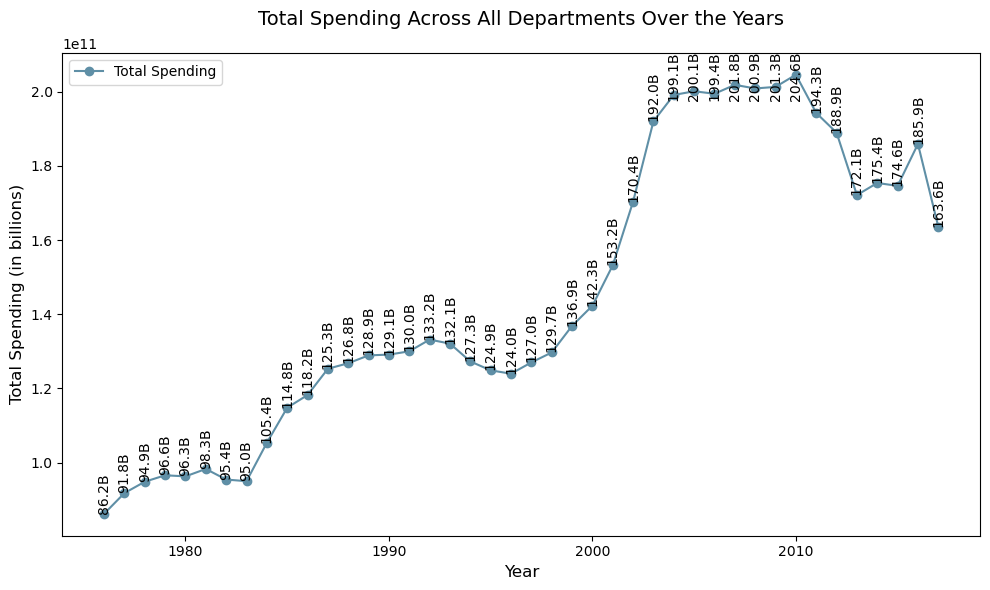

In [66]:
def abbreviate_number(num): #Define function for shortening long numbers
    if num >= 1e9: #If number is 1 billion or more convert to string "B"
        return f'{num/1e9:.1f}B'
    else:
        return str(num) #If not return the number as a string

df_total_spending = df_melted.groupby('Year')['Spending'].sum() #Groups data by year, sums spending across all departments

fig, ax = plt.subplots(figsize=(10, 6)) #Forms a figure and axes with set size 
ax.plot(df_total_spending.index, df_total_spending.values, marker='o', color='#5F8FA6', label='Total Spending') #Creates line graph of total spending over all years

y_min, y_max = ax.get_ylim() #Retrieves current y-axis limits
max_label_y = y_max - (y_max - y_min) * 0.10  # Keeps labels 10% below the top limit

for i, yval in enumerate(df_total_spending.values): #Adds text labels with y-axis constraints
    label_y = min(yval, max_label_y)  # Prevents labels from exceeding the top limit
    ax.text(df_total_spending.index[i], label_y, abbreviate_number(yval), 
            ha='center', va='bottom', fontsize=10, rotation=90) #Uses abbreviated format, places text center to point and vertical

ax.set_title('Total Spending Across All Departments Over the Years', fontsize=14, pad=20) #Add plot title
ax.set_xlabel('Year', fontsize=12) #Add plot x-label
ax.set_ylabel('Total Spending (in billions)', fontsize=12) #Add plot y-label

plt.tight_layout() #Adjust layout for spacing
ax.legend() #Display legend
plt.show() #Displays plot

## **Line Chart: Annual Spending from 1976 to 2017 by Department**

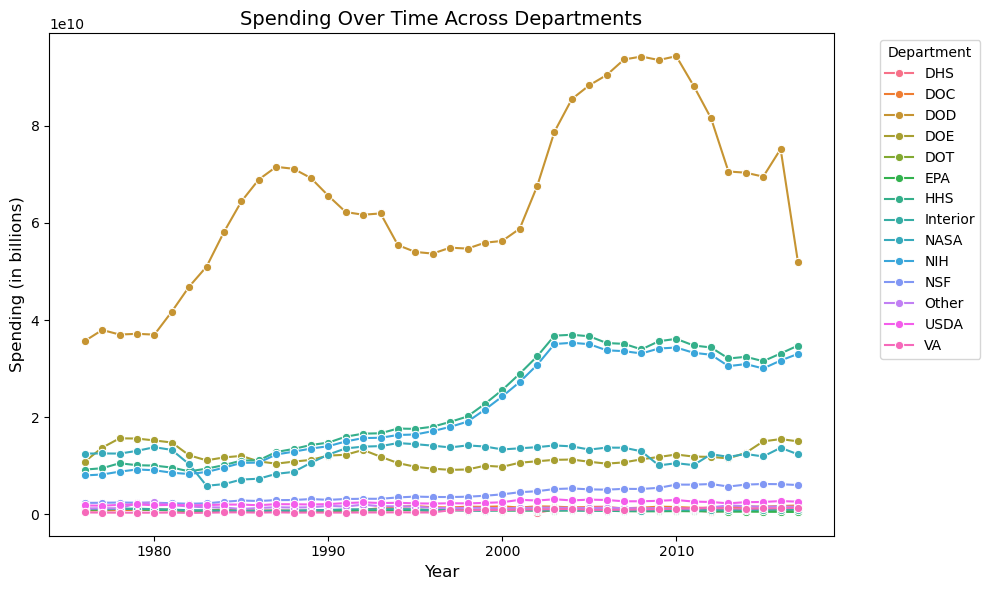

In [ ]:
df_melted['Spending'] = pd.to_numeric(df_melted['Spending'], errors='coerce') #Converts spending column to numeric values for accurate annual amounts

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=df_melted, x='Year', y='Spending', hue='Department', marker='o') #Plot line chart with Year as x-value and Spending as y-value, department as hue values

plt.title('Spending Over Time Across Departments', fontsize=14) #Plot title name and size
plt.xlabel('Year', fontsize=12) #Plot x-axis label
plt.ylabel('Spending (in billions)', fontsize=12) #Plot y-axis label
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left') #Create plot legend by department names in upper left 
plt.tight_layout() # Adjust layout for spacing
plt.show() #Display plot

## **Area Plot: Comparison of Highest Spending Department (DOD) and Lowest Spending Department (VA)**

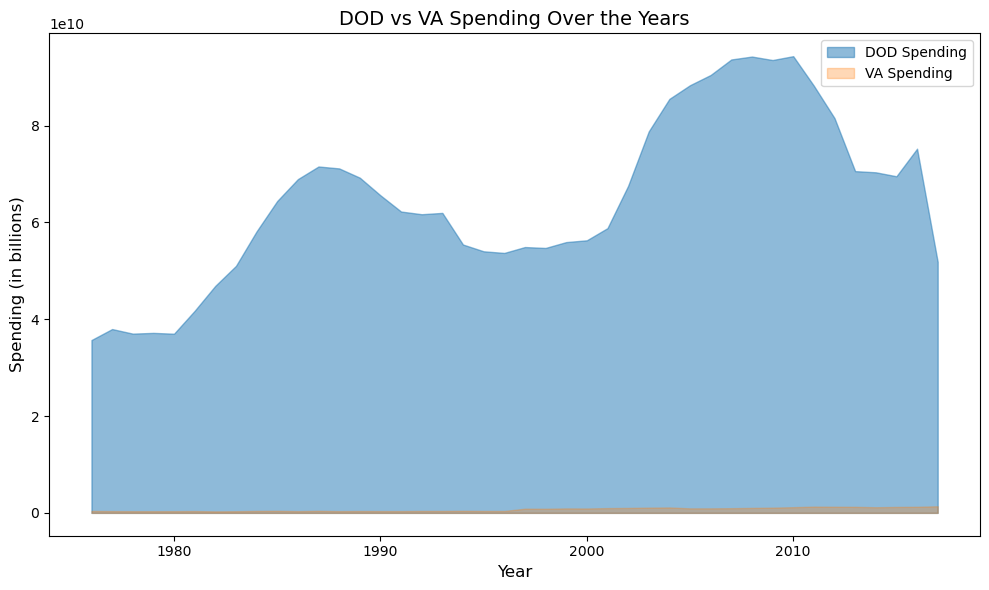

In [52]:
df_dod = df_melted[df_melted['Department'] == 'DOD'] #Selects rows where department is DOD
df_va = df_melted[df_melted['Department'] == 'VA'] #Selects rows where department is VA

df_dod_grouped = df_dod.groupby('Year')['Spending'].sum() #Sums spending for each year in DOD group
df_va_grouped = df_va.groupby('Year')['Spending'].sum() #Sums spending for each year in VA group

plt.figure(figsize=(10, 6)) #Creates area plot, defines figure size

plt.fill_between(df_dod_grouped.index, df_dod_grouped.values, color='tab:blue', alpha=0.5, label='DOD Spending') #Fills area under DOD spending curve with blue color

plt.fill_between(df_va_grouped.index, df_va_grouped.values, color='tab:orange', alpha=0.3, label='VA Spending') #Fills area under VA spending curve with orange color

plt.title('DOD vs VA Spending Over the Years', fontsize=14) #Adds plot title
plt.xlabel('Year', fontsize=12) #Adds plot x-label
plt.ylabel('Spending (in billions)', fontsize=12) #Adds plot y-label
plt.legend() #Adds plot legend 

plt.tight_layout() #Adjusts spacing to avoid overlapping of areas
plt.show() #Displays plot

## **Bar Graph Subplot: Comparison of Spending in First Year (1976) vs. Last Year (2017) by Department**

/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/1321307483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_1976, x='Department', y='Spending', palette='viridis', ax=axes[0]) #Create bar plot for year 1976, display departments/spending columns
/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/1321307483.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2017, x='Department', y='Spending', palette='viridis', ax=axes[1]) #Create bar plot for year 2017, display departments/spending columns


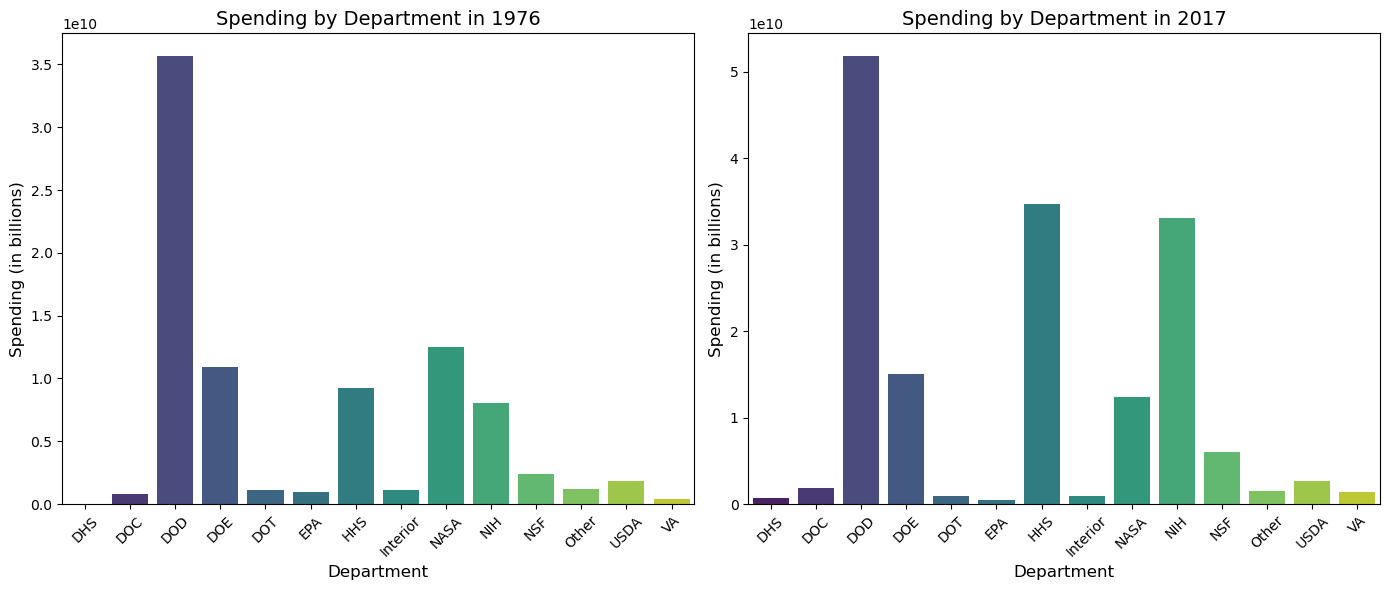

In [57]:
df_1976 = df_melted[df_melted['Year'] == 1976] #Selects rows where year is 1976
df_2017 = df_melted[df_melted['Year'] == 2017] #Selects rows where year is 2017

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #Create a 1x2 grid for subplots (2 columns, 1 row)

sns.barplot(data=df_1976, x='Department', y='Spending', palette='viridis', ax=axes[0]) #Create bar plot for year 1976, display departments/spending columns
axes[0].set_title('Spending by Department in 1976', fontsize=14) #Add plot title 
axes[0].set_xlabel('Department', fontsize=12) #Add x-axis label
axes[0].set_ylabel('Spending (in billions)', fontsize=12) #Add y-axis label
axes[0].tick_params(axis='x', rotation=45)  # Rotate department labels

sns.barplot(data=df_2017, x='Department', y='Spending', palette='viridis', ax=axes[1]) #Create bar plot for year 2017, display departments/spending columns
axes[1].set_title('Spending by Department in 2017', fontsize=14) #Add plot title 
axes[1].set_xlabel('Department', fontsize=12) #Add x-axis label
axes[1].set_ylabel('Spending (in billions)', fontsize=12) #Add y-axis label
axes[1].tick_params(axis='x', rotation=45)  #Rotate department labels

plt.tight_layout() #Adjust layout for spacing
plt.show() #Display plots

## **Stacked Bar Plot: Spending Distribution Across Departments Grouped Over 5-Year Intervals**

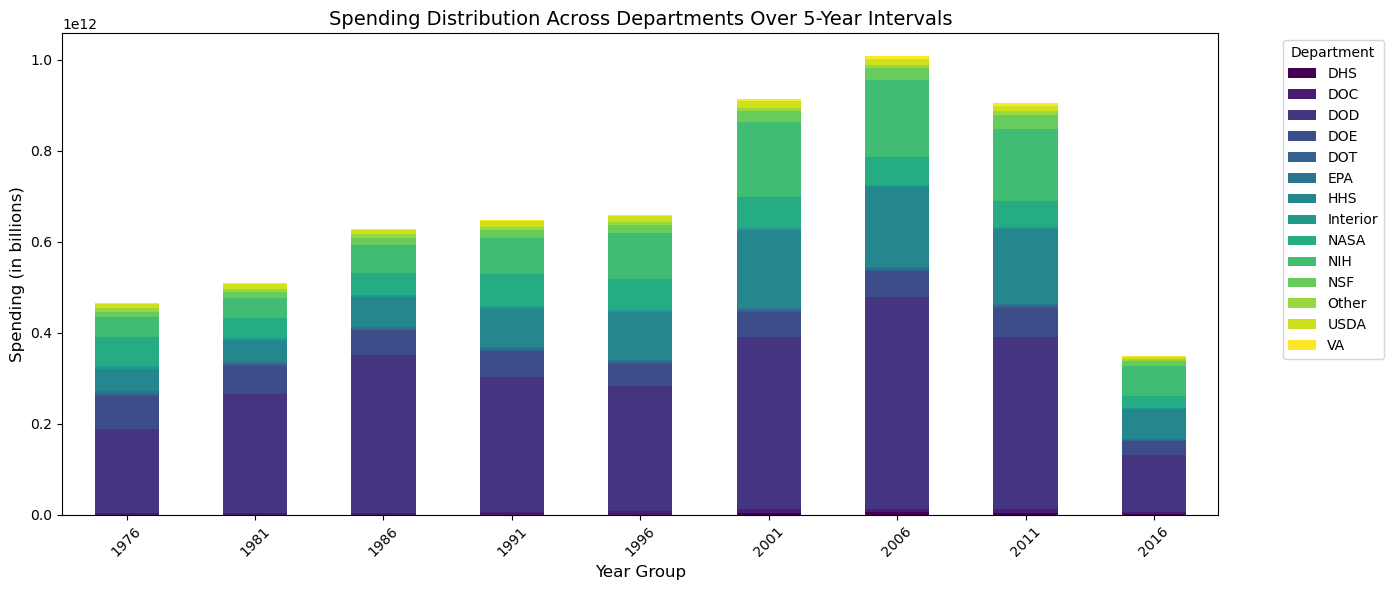

In [59]:
df_melted['Year Group'] = (df_melted['Year'] - 1976) // 5 * 5 + 1976 #Groups years into 5-year intervals starting from 1976 using integer division

df_pivot_grouped = df_melted.pivot_table(index='Year Group', columns='Department', values='Spending', aggfunc='sum') #Create a pivot table organizing department spending by new 5-year groups

df_pivot_grouped.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis') #Create stacked bar chart

plt.title('Spending Distribution Across Departments Over 5-Year Intervals', fontsize=14) #Add plot title
plt.xlabel('Year Group', fontsize=12) #Add plot x-label
plt.ylabel('Spending (in billions)', fontsize=12) #Add plot y-label
plt.xticks(rotation=45)  # Rotates x-axis labels
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left') #Add plot legend 
plt.tight_layout() #Adjust layout for spacing

plt.show() #Display plot

## **Pivot Table & Aggregation Functions:**

#### The following section manipulates the federal spending DataFrame, including aggregation, filtering, and transformation of variables. These operations are more efficient with tidy data because there is a consistent way to refer to variables as each variable is within its own column. With tidy data, pivot tables become especially effective, as identifying the correct columns for grouping and calculating values is straightforward, leading to quick and accurate results. Below you will see functions such as average, sum, and max applied to the tidy data.

### **Average Spending by Department:**

In [95]:
pivot_avg_spending = df_melted.pivot_table(values='Spending', index='Department', aggfunc='mean') #Calculates average spending for each department across all years
pivot_avg_spending = pivot_avg_spending.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators

print("Average Spending by Department:")
print(pivot_avg_spending)

Average Spending by Department:
                   Spending
Department                 
DHS            $994,875,000
DOC          $1,231,500,000
DOD         $64,685,190,476
DOE         $11,883,380,952
DOT            $917,785,714
EPA            $750,428,571
HHS         $22,296,761,905
Interior       $900,571,429
NASA        $12,140,261,905
NIH         $21,117,571,429
NSF          $4,038,809,524
Other        $1,494,761,905
USDA         $2,380,809,524
VA             $733,880,952


/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/1964228633.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_avg_spending = pivot_avg_spending.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators


### **Total Spending by Department:**

In [84]:
pivot_total_spending = df_melted.pivot_table(values='Spending', index='Department', aggfunc='sum') #Creates a pivot table with values from spending column and an index of departments, sums spending values over years

pivot_total_spending = pivot_total_spending.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators

print("Total Spending by Department:") 
print(pivot_total_spending) #Prints pivot table

Total Spending by Department:
                      Spending
Department                    
DHS            $15,918,000,000
DOC            $51,723,000,000
DOD         $2,716,778,000,000
DOE           $499,102,000,000
DOT            $38,547,000,000
EPA            $31,518,000,000
HHS           $936,464,000,000
Interior       $37,824,000,000
NASA          $509,891,000,000
NIH           $886,938,000,000
NSF           $169,630,000,000
Other          $62,780,000,000
USDA           $99,994,000,000
VA             $30,823,000,000


/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/71749703.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_total_spending = pivot_total_spending.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators


### **Average Total Federal R&D Spending in 3-Year Periods:**

In [83]:
df_melted['Year_Group'] = (df_melted['Year'] // 3) * 3

# Create pivot table with average spending by year for each 3-year period
pivot_avg_spending_by_year = df_melted.pivot_table(values='Spending', index='Year_Group', aggfunc='mean')

pivot_avg_spending_by_year = pivot_avg_spending_by_year.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators

print("Average Spending by Year for 3-Year Periods:")
print(pivot_avg_spending_by_year) #Prints pivot table

Average Spending by Year for 3-Year Periods:
                   Spending
Year_Group                 
1974         $6,632,846,154
1977         $7,263,384,615
1980         $7,437,358,974
1983         $8,082,025,641
1986         $9,496,025,641
1989         $9,949,897,436
1992        $10,064,871,795
1995         $9,637,923,077
1998        $10,483,692,308
2001        $12,574,658,537
2004        $14,253,142,857
2007        $14,379,976,190
2010        $13,994,190,476
2013        $12,431,238,095
2016        $12,481,821,429


/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/1592105187.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_avg_spending_by_year = pivot_avg_spending_by_year.applymap(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators


### **Percentage of Total Spending by Department:**

In [97]:
pivot_spending_percent = df_melted.pivot_table(values='Spending', index='Department', aggfunc='sum')
#Creates pivot table that sums the spending for each department
total_spending = pivot_spending_percent.sum().sum() #Calculates total spending across all departments, sums all values in pivot table
pivot_spending_percent = pivot_spending_percent / total_spending * 100 #Calculates the percentage of total spending for each deptartment, divides individual department spending by total then multiplys by 100

print("Percentage of Total Spending by Department:") 
print(pivot_spending_percent) #Print Pivot Table

Percentage of Total Spending by Department:
             Spending
Department           
DHS          0.261468
DOC          0.849599
DOD         44.625645
DOE          8.198222
DOT          0.633171
EPA          0.517713
HHS         15.382306
Interior     0.621295
NASA         8.375441
NIH         14.568794
NSF          2.786333
Other        1.031221
USDA         1.642496
VA           0.506297


### **Department with Most Spending Per Year:**

In [82]:
df_melted['Year_Group'] = (df_melted['Year'] // 3) * 3 #Creates new column that groups years into 3-year intervals 

pivot_max_spending = df_melted.pivot_table(values='Spending', index='Year_Group', columns='Department', aggfunc='max')
#Forms pivot table showing maximum spending for each department within each 3-year group

max_spending_dept = pivot_max_spending.idxmax(axis=1) #Determines department with highest spending in each 3-year group

max_spending_value = pivot_max_spending.max(axis=1) #Selects the maximum spending value for each 3-year group

max_spending_summary = pd.DataFrame({
    'Year Group': max_spending_dept.index,
    'Department': max_spending_dept.values,
    'Spending': max_spending_value.values
}) # Create a DataFrame showing the department with the max spending and the corresponding value

max_spending_summary['Spending'] = max_spending_summary['Spending'].apply(lambda x: f"${x:,.0f}") #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators

print("Max Spending by Department for Each 3-Year Period:")
print(max_spending_summary) #Prints pivot table

Max Spending by Department for Each 3-Year Period:
    Year Group Department         Spending
0         1974        DOD  $35,696,000,000
1         1977        DOD  $37,967,000,000
2         1980        DOD  $46,893,000,000
3         1983        DOD  $64,416,000,000
4         1986        DOD  $71,541,000,000
5         1989        DOD  $69,231,000,000
6         1992        DOD  $61,956,000,000
7         1995        DOD  $54,903,000,000
8         1998        DOD  $56,297,000,000
9         2001        DOD  $78,782,000,000
10        2004        DOD  $90,443,000,000
11        2007        DOD  $94,247,000,000
12        2010        DOD  $94,325,000,000
13        2013        DOD  $70,583,000,000
14        2016        DOD  $75,213,000,000


### **Percentage Change of Spending Over Years by Department:**

In [85]:
pivot_yearly_spending = df_melted.pivot_table(values='Spending', index='Year', columns='Department', aggfunc='sum')
# Forms pivot table with department as columns, index as Year, and sums spending values by year

pivot_yearly_spending_pct_change = (pivot_yearly_spending.iloc[-1] - pivot_yearly_spending.iloc[0]) / pivot_yearly_spending.iloc[0] * 100
# Calculates percentage change from the first year to the last year for each department's spending

print("Percentage Change of Spending:")
print(pivot_yearly_spending_pct_change) #Prints pivot table

Percentage Change of Spending:
Department
DHS                inf
DOC         122.710623
DOD          45.287987
DOE          38.136372
DOT         -18.038529
EPA         -47.727273
HHS         276.739649
Interior    -17.100694
NASA         -1.214737
NIH         311.862928
NSF         154.637437
Other        30.394626
USDA         42.896026
VA          238.366337
dtype: float64


### **Standard Deviation of Annual Spending by Department:**

In [86]:
pivot_spending_std = df_melted.pivot_table(values='Spending', index='Department', aggfunc='std') #Forms pivot table that calculates the SD of spending for each department

pivot_spending_std = pivot_spending_std.applymap(lambda x: f'${x:,.2f}') #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators

print("Standard Deviation of Annual Spending by Department:")
print(pivot_spending_std) #Prints pivot table

Standard Deviation of Annual Spending by Department:
                      Spending
Department                    
DHS            $351,283,907.02
DOC            $366,169,176.55
DOD         $17,287,179,370.76
DOE          $1,820,444,169.23
DOT            $153,869,684.44
EPA            $160,085,517.22
HHS         $10,628,810,356.78
Interior       $122,979,106.47
NASA         $2,363,478,245.62
NIH         $10,316,142,132.35
NSF          $1,407,876,471.13
Other          $289,981,732.77
USDA           $382,705,340.27
VA             $370,561,354.15


/var/folders/r_/bpq9vckn439c9fw6zvckr92r0000gn/T/ipykernel_1465/436687120.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_spending_std = pivot_spending_std.applymap(lambda x: f'${x:,.2f}') #Applies function to each value in DataFrame, formats numbers with $ sign and adds comma separators


### **Key Insights from Analysis:**

-The DOD, HHS, and NIH have the highest average spending among all departments.

-Over $2.7 trillion has been spent on the Department of Defense.

-The DHS has received the least total funding but has only 16 years of recorded allocations, compared to 42 years for other departments. 

-Average total federal spending has increased by nearly $6 million since 1976.

-DOD accounts for 44% of federal spending, HHS for 15%, and NIH for 14%, while departments like EPA, DOT, and VA each make up less than 1%.

-The NIH, HHS, and VA have experienced the highest percentage growth in spending. 
